# 타이타닉 튜토리얼 1 - Exploratory data analysis, visualization, machine learning


```
1.데이터셋 확인
  1.1 Null data check
  1.2 Target label 확인
2.Exploratory data analysis
  2.1 Pclass
  2.2 Sex
  2.3 Both Sex and Pclass
  2.4 Age
  2.5 Pclass, Sex, Age
  2.6 Embarkewd
  2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)
  2.8 Cabin
```




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn') #- custom style sheet
sns.set(font_scale=2.5) #- seaborn의 font_scale 설정

import missingno as msno #- 결측치 시각화

import warnings #- ignore warnings
warnings.filterwarnings('ignore')

#- notebook 실행 브라우저에서 바로 그림보여주기
%matplotlib inline  


In [2]:
print(plt.style.available) #- matplotlib에서 사용할 수 있는 stylesheet 목록

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어있지만, 가끔 null data가 존재합니다. 이를 확인하고 수정합니다.
2. 탐색적 데이터 분석 - 여러 feature들을 개별적으로 분석하고, feature들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용해서 insight을 얻습니다. 
3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록, feature들을 engineering 합니다. one-hot encoding, class 로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다. 
4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때엔 sklearn을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 있습니다. 
5. 모델 학습 및 에측 - trainset을 가지고 모델을 학습시킨 후, testset을 가지고 prediction 합니다.
6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달리집니다. 학습된 모델이 어떤 것을 학습하였는지 확인해봅니다. 

# 1. Dataset 확인
- 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화 되어 있으며, 많이 쓰이는 라이브러리는 pandas 입니다. 
- 우리는 pandas를 사용하여 데이터셋의 간단한 통계적 분석부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다. 
- 캐글에서 데이터셋은 보통 train, testset으로 나뉘어 있습니다. 


In [3]:
dir_path = os.getenv("HOME") + "/aiffel/Kaggle_Transcription_Study/Data/Titanic_tutorial/" 
df_train = pd.read_csv(dir_path +'train.csv')
df_test = pd.read_csv(dir_path +'test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 우리가 다루려는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label은 Survived입니다. 

|변수(feature, variable)|정의|설명|타입|
|:---:|:---:|:---:|:---:|
|Survival|생존여부|target label 임. 1, 0 으로 표현됨|integer|
|Pclass|티켓의 클래스|1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature|integer|
|sex|성별|male, female로 구분되며 binary|string|
|Age|나이|continuous|integer|
|SibSp|함께 탑승한 형제와 배우자의 수|quantitative|integer|
|parch|함께 탑승한 부모, 아이의 수|quantitative|integer|
|ticker|티켓 번호|alphabat + integer|string|
|fare|탑승료|continuous|float|
|cabin|객실 번호|alphabat + integer|string|
|embarked|탑승 항구|C = Cherbourg, Q = Queenstown, S = Southampton|string|

- pandas dataframe에는 descibe() 메소드가 있는데, 이를 쓰면 각 feature가 가진 통계치들을 반환해줍니다. 

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 테이블에서 보다시피, PassengerId 숫자와 다른, null data가 존재하는 열(feature)가 있다고 짐작할 수 있습니다. 
- 그래프로 시각화해서 살펴봅시다.

## 1.1 Null data check

In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#- 각 컬럼마다 null 값의 비율을 출력

for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value:{:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))

    print(msg)

column: PassengerId	 Percent of NaN value:0.00%
column:   Survived	 Percent of NaN value:0.00%
column:     Pclass	 Percent of NaN value:0.00%
column:       Name	 Percent of NaN value:0.00%
column:        Sex	 Percent of NaN value:0.00%
column:        Age	 Percent of NaN value:19.87%
column:      SibSp	 Percent of NaN value:0.00%
column:      Parch	 Percent of NaN value:0.00%
column:     Ticket	 Percent of NaN value:0.00%
column:       Fare	 Percent of NaN value:0.00%
column:      Cabin	 Percent of NaN value:77.10%
column:   Embarked	 Percent of NaN value:0.22%


{:>10} 10자리로 표현할 것인데 오른쪽 정렬을 하겠다. 

{:.2f} Format float 2 decimal places

문자열 정렬 : 
왼쪽 정렬 < 오른쪽 정렬 > 가운데 정렬 ^

참고 : 
https://mkaz.blog/code/python-string-format-cookbook/
https://blockdmask.tistory.com/424


In [9]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value:{:.2f}%'.format(col, 100* (df_test[col].isnull().sum() / df_test[col].shape[0])) #- 각 컬럼의 100*(null값 개수)/(데이터 개수)
    
    print(msg)

column: PassengerId	 Percent of NaN value:0.00%
column:     Pclass	 Percent of NaN value:0.00%
column:       Name	 Percent of NaN value:0.00%
column:        Sex	 Percent of NaN value:0.00%
column:        Age	 Percent of NaN value:20.57%
column:      SibSp	 Percent of NaN value:0.00%
column:      Parch	 Percent of NaN value:0.00%
column:     Ticket	 Percent of NaN value:0.00%
column:       Fare	 Percent of NaN value:0.24%
column:      Cabin	 Percent of NaN value:78.23%
column:   Embarked	 Percent of NaN value:0.00%


- train, test set 에서 Age( 둘다 약 20%), Cabin(둘다 약 80%), embarked(train 만 0.22%)의 null data 가 존재합니다.
- MANO 라이브러리를 사용하면 null data의 존재를 쉽게 볼 수 있습니다. 

<AxesSubplot:>

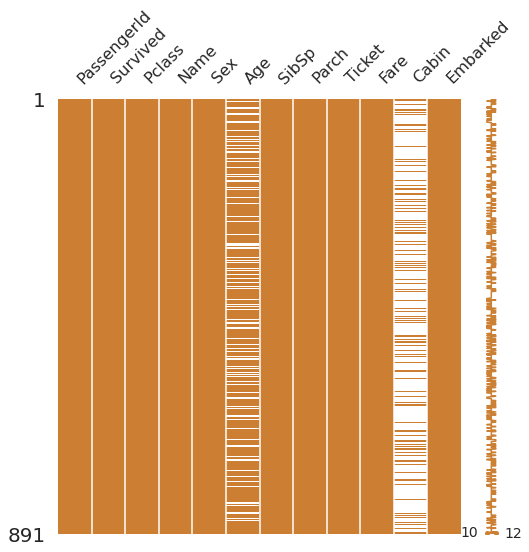

In [10]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2)) 

<AxesSubplot:>

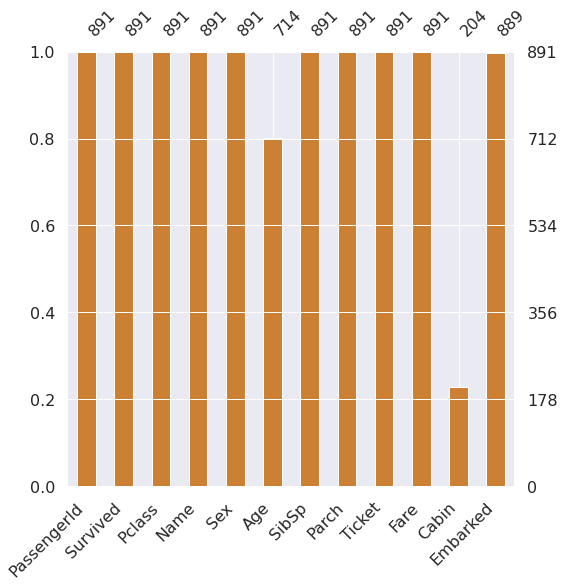

In [11]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

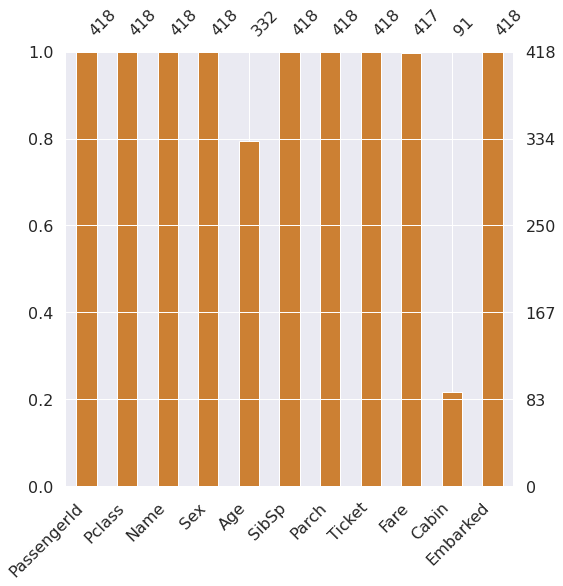

In [12]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## 1.2 Target label 확인
- target label이 어떤 distribution을 가지고 있는지 확인합니다.
- binary classification 문제의 경우에서 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있습니다. 

[matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
- figsize is a tuple of the width and height of the figure in inches
- 1 inch = 2.54 cm


[matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

- explode : array-like, default: None

If not None, is a len(x) array which specifies the fraction of the radius with which to offset each wedge.

- autopct: None or str or callable, default: None

If not None, is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt % pct. If it is a function, it will be called.

---

[pd.Series.value_counts()](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.value_counts.html)

Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
Return a Series containing counts of unique values.



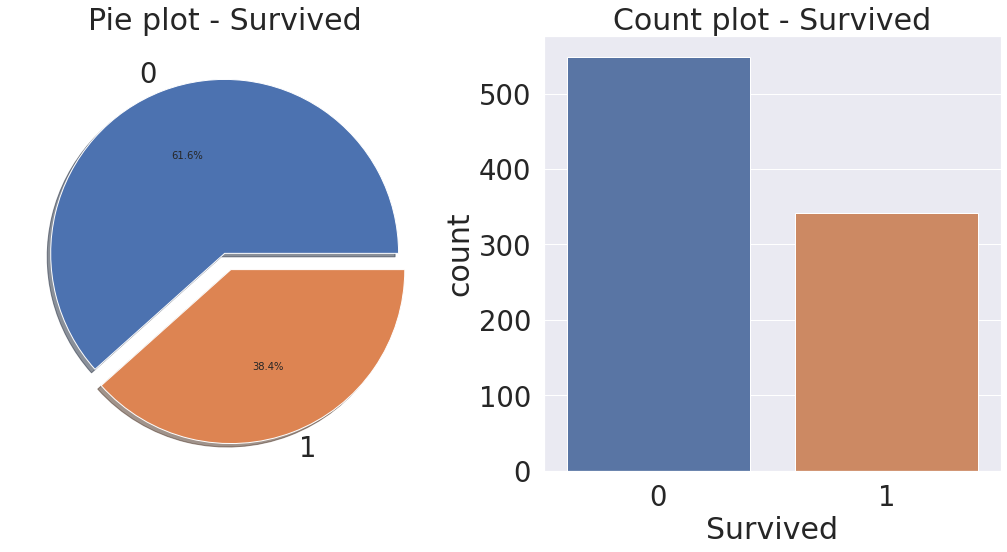

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) #- (18,8)inch의 figure와 1행 2열의 Subplots를 생성

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
#- df_train에서 Survived 컬럼의 고유한 값의 빈도를 담은 시리즈를 만들고, pie plot으로 시각화 하는데, 각 pie의 간격을 0.1 로 하고, autopct를 문자열 포매팅으로 파이조각 백분율을 소수점 1자리까지 %로 표기하도록 하며, shadow를 줍니다.

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()


- 죽은 사람이 많습니다. 
- 38.4%가 살아남았습니다.
- target label의 분포가 제법 균일(balanced) 합니다. 불균일한 경우, 예를 들어 100 중 1이 99, 0이 1개인 경우에는 만약 모델이 모든 것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행합니다.

# 2. Exploratory data analysis
- 수많은 데이터 안에 숨겨진 사실을 찾기 위해서는 적절한 시각화가 필요합니다.
- 시각화 라이브러리는 matplotlib, seaborn, plotly등이 있습니다.

## 2.1 Pclass
- 먼저 Pclass에 대해 살펴보겠습니다. Pclass는 ordinal, 서수형 데이터입니다. 카테고리이면서, 순서가 있는 데이터타입입니다. 
- 먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있습니다. 또한 pivot이란 메소드도 있습니다. 
- 'Pclass', 'Survived' 를 가져온 후, pclass로 묶습니다. 그러고 나면 각 pclass마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다. 
- 아래와 같이 count()를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, sum()을 하면, 216명중 생존한 (survived=1) 사람의 총합을 주게 됩니다. 

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pandas 의 crosstab을 사용하면 좀 더 위 과정을 수월히 볼 수 있습니다.


In [16]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


[pandas.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

- grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있습니다. 

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


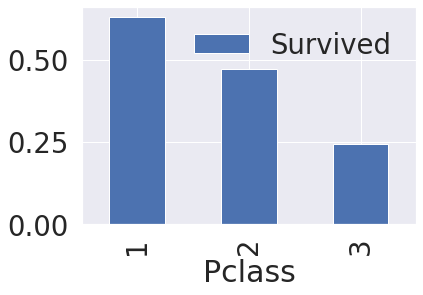

In [18]:
ax = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

- Pclass 가 좋을 수록(1st) 생존률이 높습니다. 
- seaborn의 countplot을 이용해서 특정 label에 따른 개수를 확인할 수 있습니다.


[plot.bar](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)


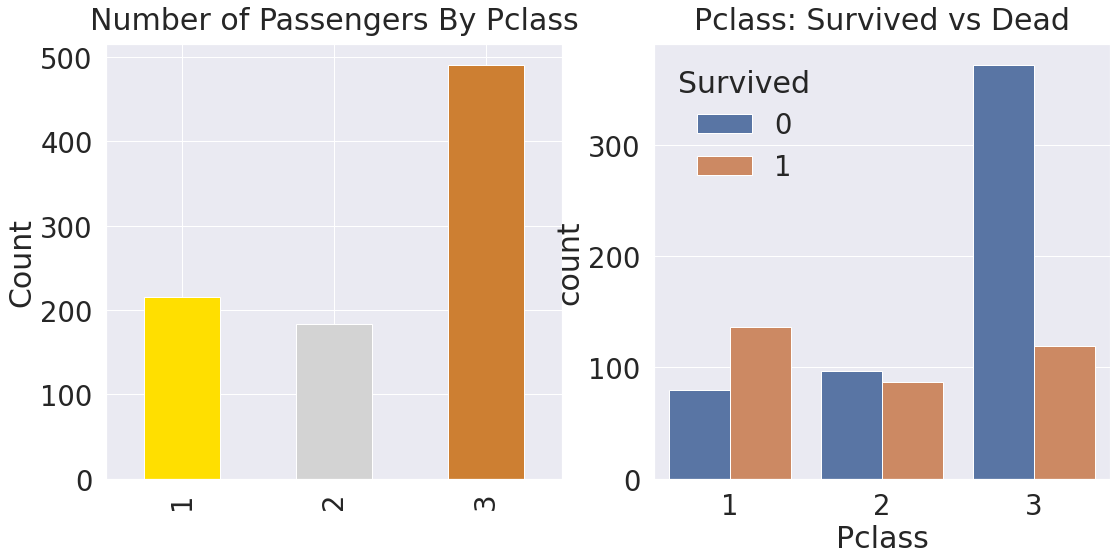

In [19]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

- 클래스가 높을 수록 생존확률이 높은 것을 확인할 수 있습니다.
- Pclass 1, 2, 3 순서대로 63%, 48%, 25% 입니다. 
- 우리는 생존에 Pclass가 큰 영향을 미친다고 볼 수 있고, 나중에 모델을 세울때 이 feature를 사용하는 것이 좋다고 판단할 수 있습니다. 

## 2.2 Sex
- 이번에는 성별로 생존률이 어떻게 달라지는지 확인해보자
- 마찬가지로 pandas groupby와 seaborn countplot을 사용해서 시각화해보자

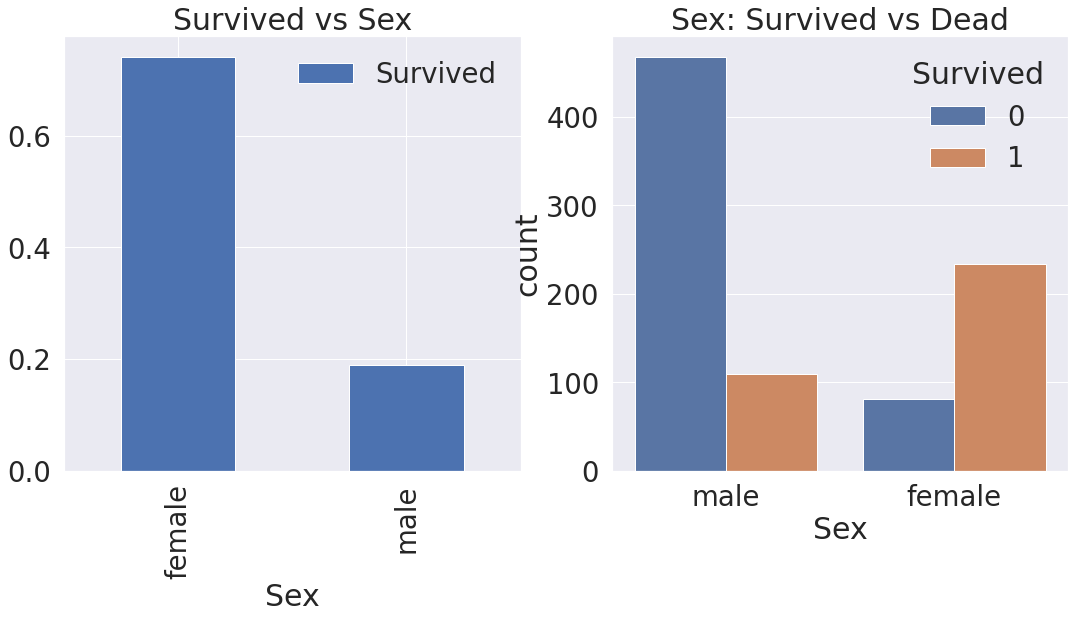

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여자가 생존할 확률이 더 높습니다.


In [21]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [23]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로, Sex 도 예측 모델에 쓰일 중요한 feature임을 알 수 있습니다. 

## 2.3 Both Sex and Pclass
- sex, pclass 두가지에 관하여 생존이 어떻게 달라지는지 확인해보자
- seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이뤄진 그래프를 그릴 수 있습니다.

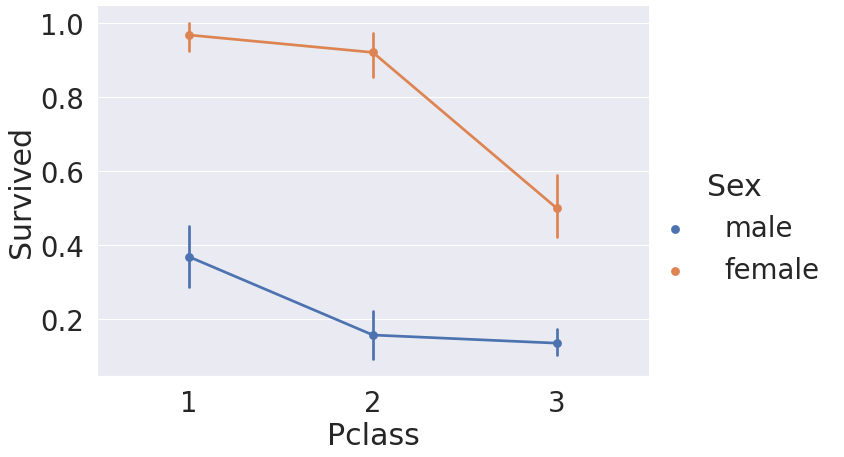

In [24]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)


- 모든 클래스에서 female이 살 확률이 male보다 높습니다.
- 남자, 여자 할 것 없이 클래스가 높을 수록 살 확률이 높습니다.
- 위 그래프는 hue 대신 column으로 하면 아래와 같습니다. 

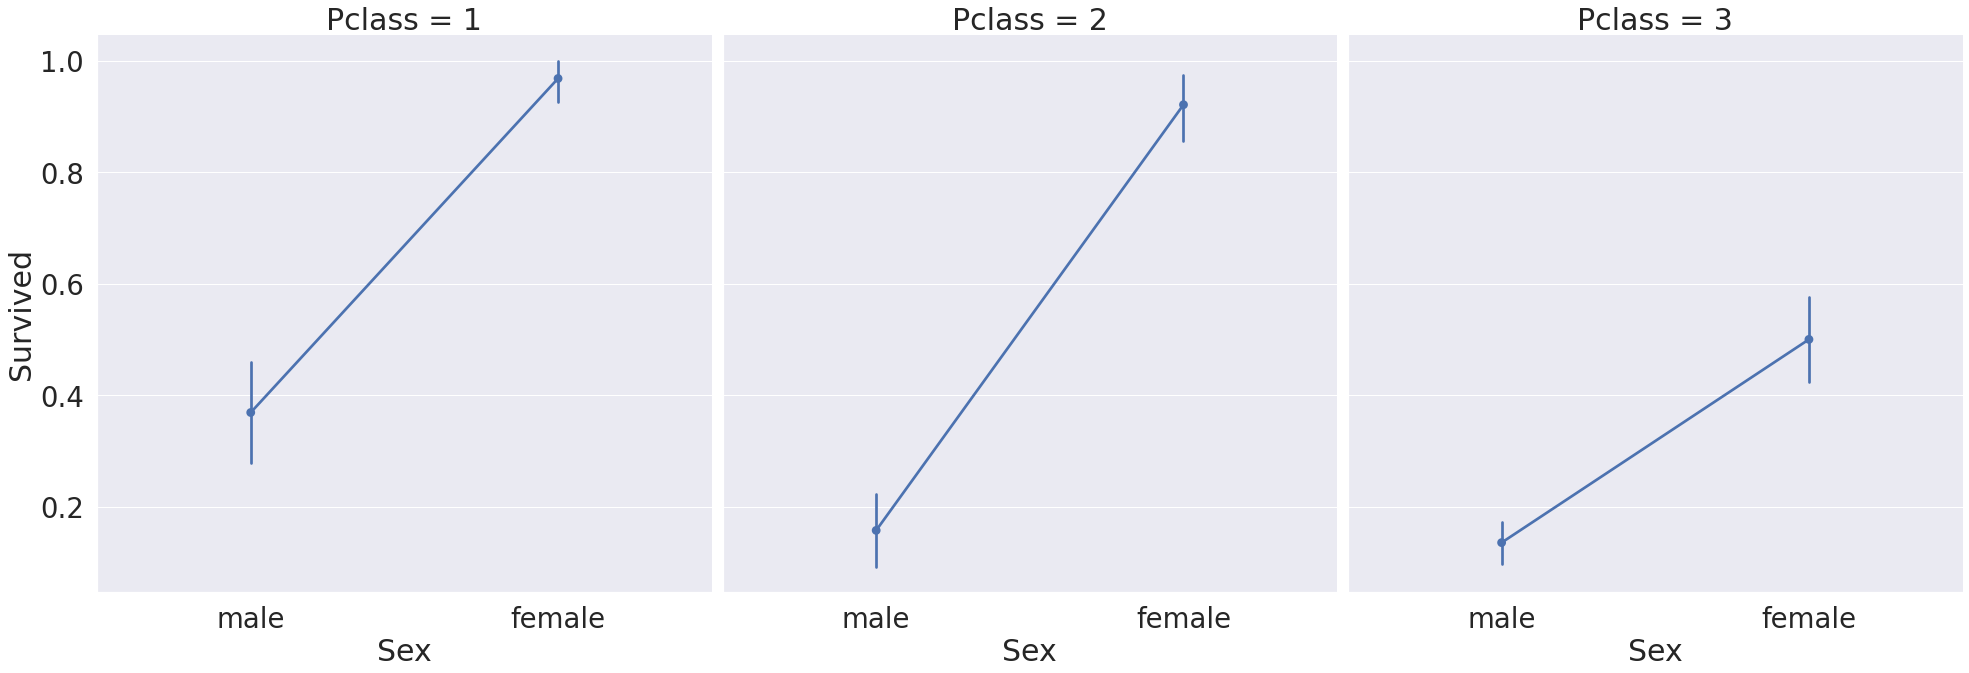

In [25]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

## 2.4 Age


In [26]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


- 생존에 따른 Age의 histogram을 그려봅니다.
- A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.



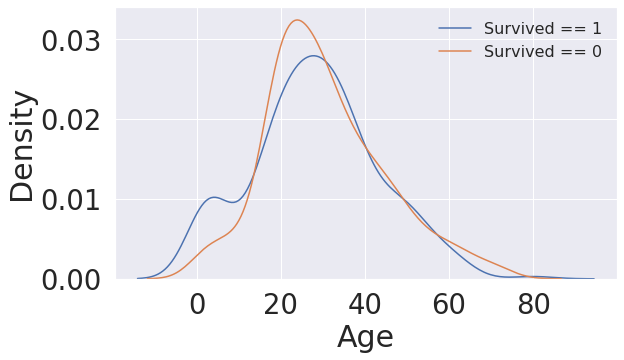

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'], fontsize = 16)
plt.show()      

- 생존자 중 나이가 어린 경우가 많습니다.

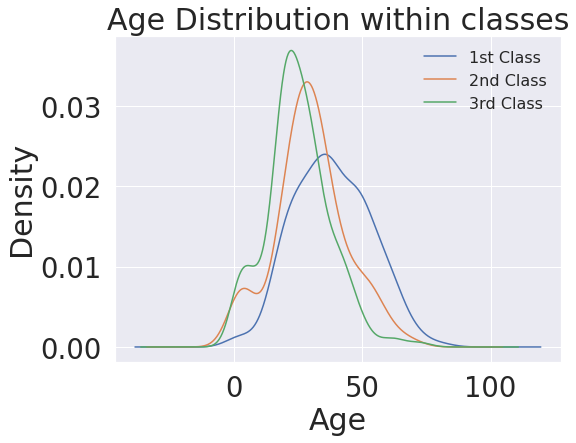

In [31]:
#- Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'], fontsize=16)

- 클래스가 높을 수록 나이많은 사람의 비중이 커집니다.
- 나이대가 변하면서 생존률이 어떻게 되는지 봅시다.
- 나이 범위를 점점 넓혀가며, 생존률이 어떻게 변하는지 봅시다. 

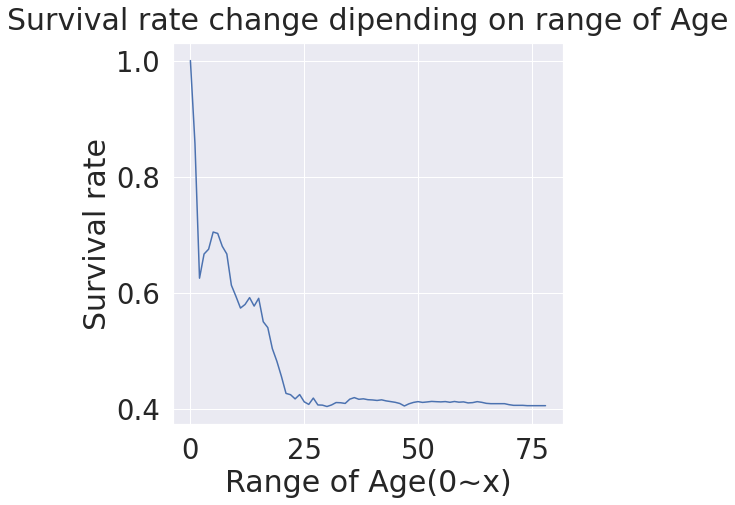

In [32]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change dipending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존률이 확실히 높습니다.
- 나이는 중요한 feature라는 사실을 확인했습니다. 

## 2.5 Pclass, Sex, Age
- 지금까지 본 Sex, Pclass, Age, Survived 모두에 대해서 살펴봅니다. 이를 쉽게 그려주는 것이 seaborn의 violinplot입니다. 
- x 축은 우리가 나눠 보고싶어하는 case(여기서는 Pclass, Sex)를 나타내고, y 축은 보고 싶어하는 distribution(Age) 입니다. 


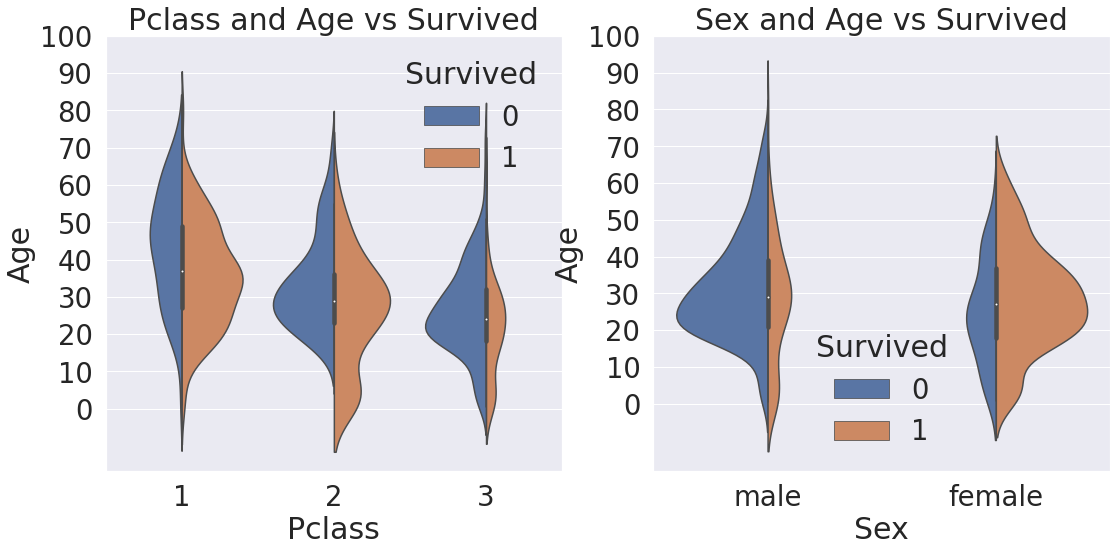

In [33]:
f, ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 왼쪽 그림은 Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다. 
- 오른쪽 그림은 Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프입니다.
- 생존만 보면, 모든 클래스에서 나이가 어릴수록 생존을 많이 한 것을 볼 수 있습니다.
- 오른쪽 그림에서 보면, 여자가 생존을 많이 한 것을 알 수 있습니다. 

## 2.6 Embarked
- embarked는 탑승한 항구를 나타냅니다.
- 위에서 해왔던 것과 비슷하게 탑승한 곳에 따른 생존을 살펴봅니다. 


<AxesSubplot:xlabel='Embarked'>

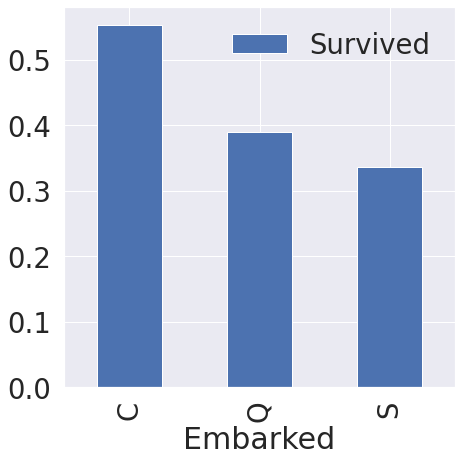

In [34]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 조금의 차이는 있지만 생존률은 비슷함. 그래도 C가 제일 높음
- 모델에 얼마나 큰 영향을 미칠지는 모르지만, 그래도 사용해보겠습니다. 
- 모델을 만들고나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인할 수 있음. 
- 다른 feature로 split하여 살펴봅니다.


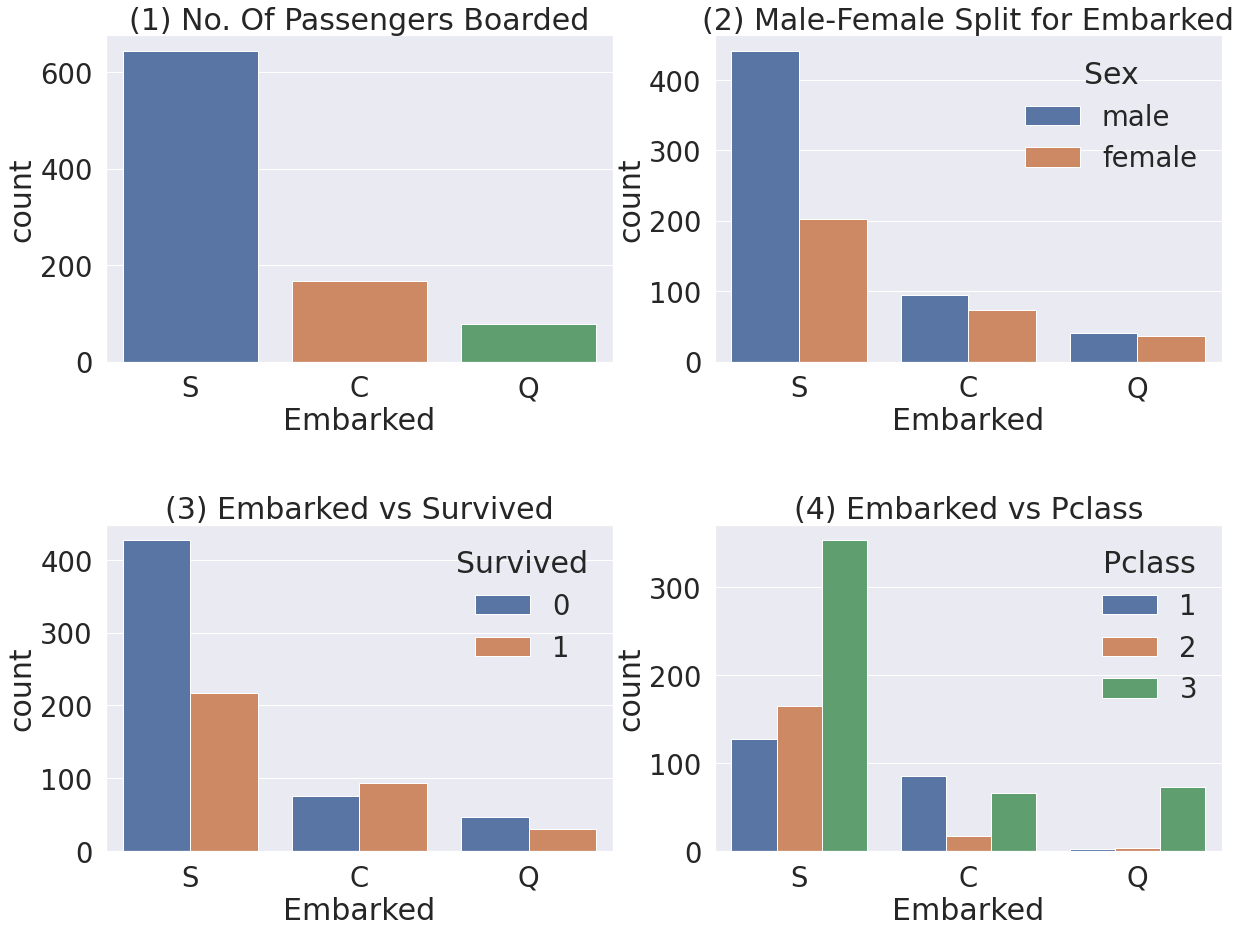

In [36]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.
- Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
- Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다. (이전 그래프에서 봤었습니다)
- Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class 가 많아서 생존확률이 낮게 나옵니다.

## 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)
- sibSp와 Parch를 합하면 Family가 됩니다.
- family로 합쳐서 분석해봅니다. 


In [37]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #- 자신을 포함해야하므로 1을 더합니다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 #- 자신을 포함해야하니 1을 더합니다.

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


- FamilySize와 생존의 관계를 살펴봅니다.


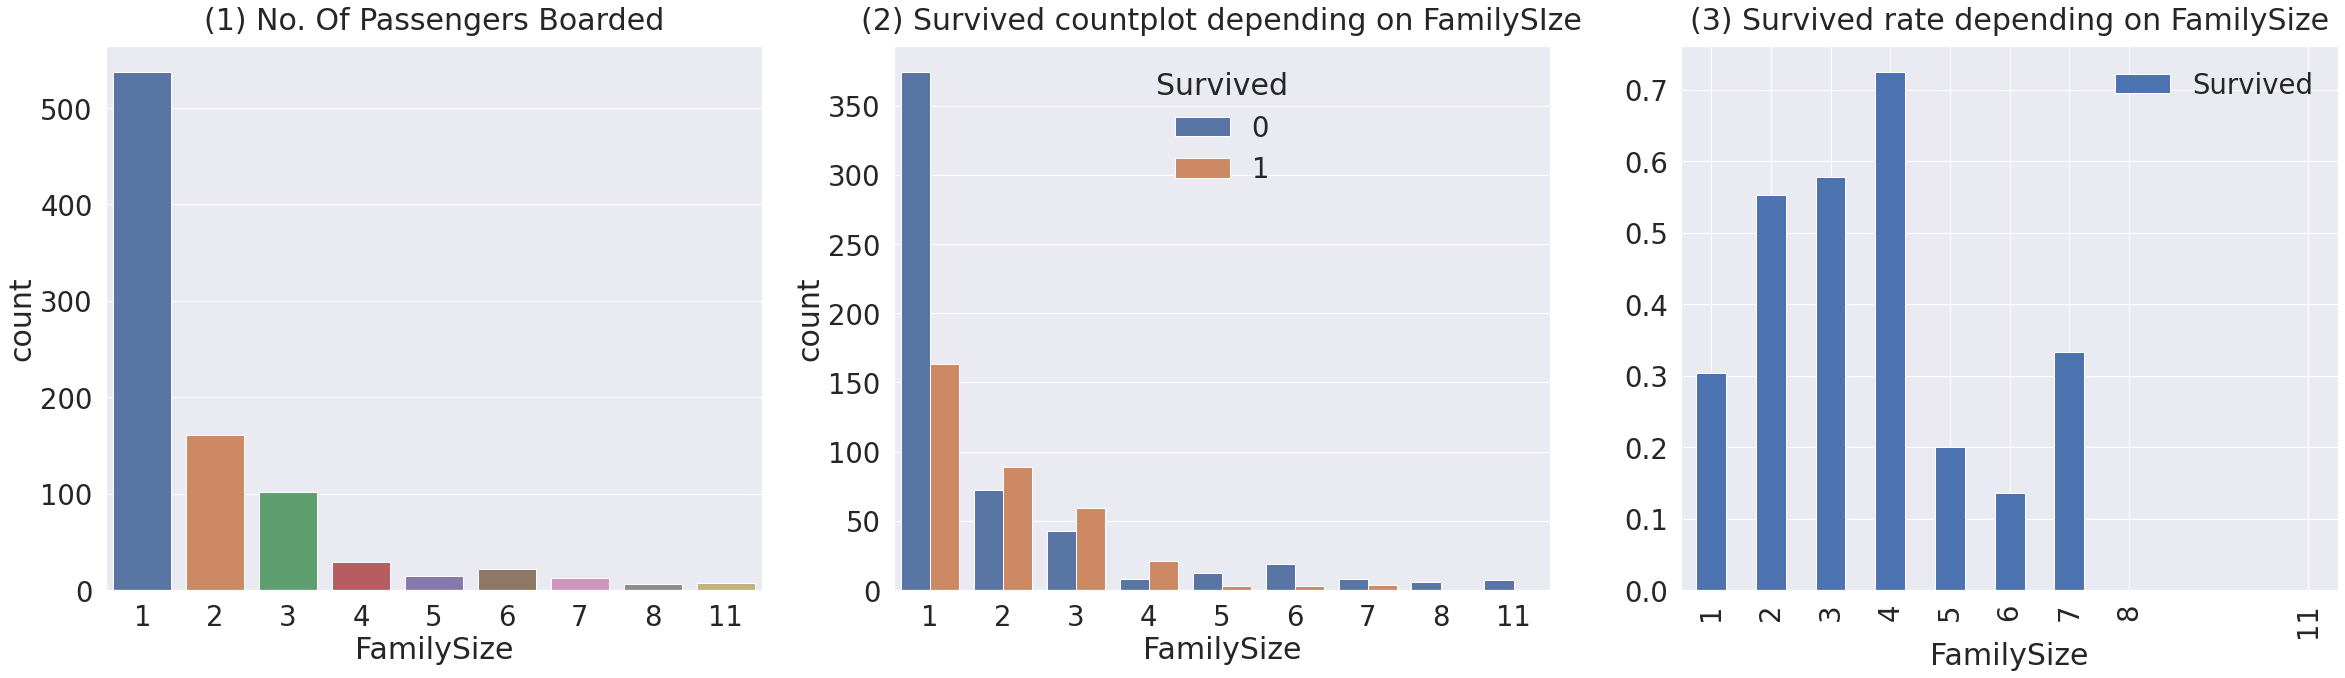

In [45]:
f, ax = plt.subplots(1, 3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySIze', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)
#- 왜 내림차순 정렬이 적용이 안될까? 

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.
- Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지네요. 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.

## 2.8 Fare
- Fare는 탑승요금이며, continuous feature입니다. histogram을 그려봅니다. 


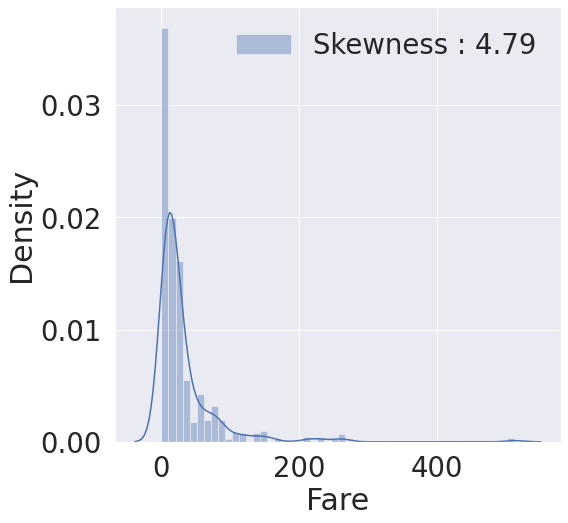

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 매우 비대칭임.( high skewness) 만약 이대로 모델에 넣어주면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier에 대해 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다. 
- outlier의 영향을 줄이기 위해 Fare에 log를 취합니다. 
- 여기서 우리는 pandas의 유용한 기능을 사용할 겁니다. dataFrame의 특정 columns에 공통된 작업(함수)를 사용하고 싶으면 아래의 map, 또는 apply를 사용할 수 있습니다. 
- Fare columns의 데이터 모두를 log 값을 취하고자 할때, lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 

In [47]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() #- testset에 있는 nan value를 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

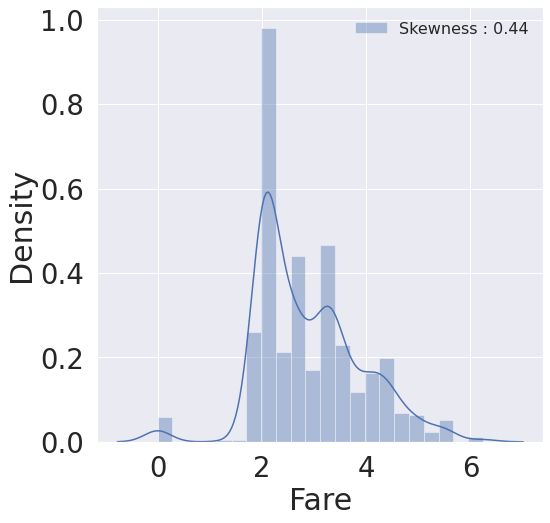

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best', fontsize=16)

- log를 취하니 비대칭성이 많이 사라졌습니다.
- 이런 작업을 통해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
- 방금한 것은 feature engineering에 들어가는 부분인데 미리 작업했습니다.
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering이라 합니다.

## 2.9 Cabin
- 이 feature는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기 쉽지 않습니다. 
- 따라서 우리가 세우려는 모델에 포함시키지 않도록 합니다. 

In [51]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10 Ticket
- 이 feature는 NaN은 없습니다. 일단 string data 이므로, 우리가 어떤 작업들을 해줘야 실제 모델에 사용할 수 있는데, 이를 위해서는 아이디어가 필요합니다. 


In [52]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
CA 2144     6
347088      6
           ..
3101276     1
112052      1
364850      1
11813       1
382649      1
Name: Ticket, Length: 681, dtype: int64

- 이처럼 ticket number는 매우 다양합니다. 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까요?
